=== Exercício 3A: Dataset de Imagens Sintéticas ===
Tamanho do dataset: 100
Primeira amostra - Tipo: <class 'PIL.Image.Image'>, Label: 0


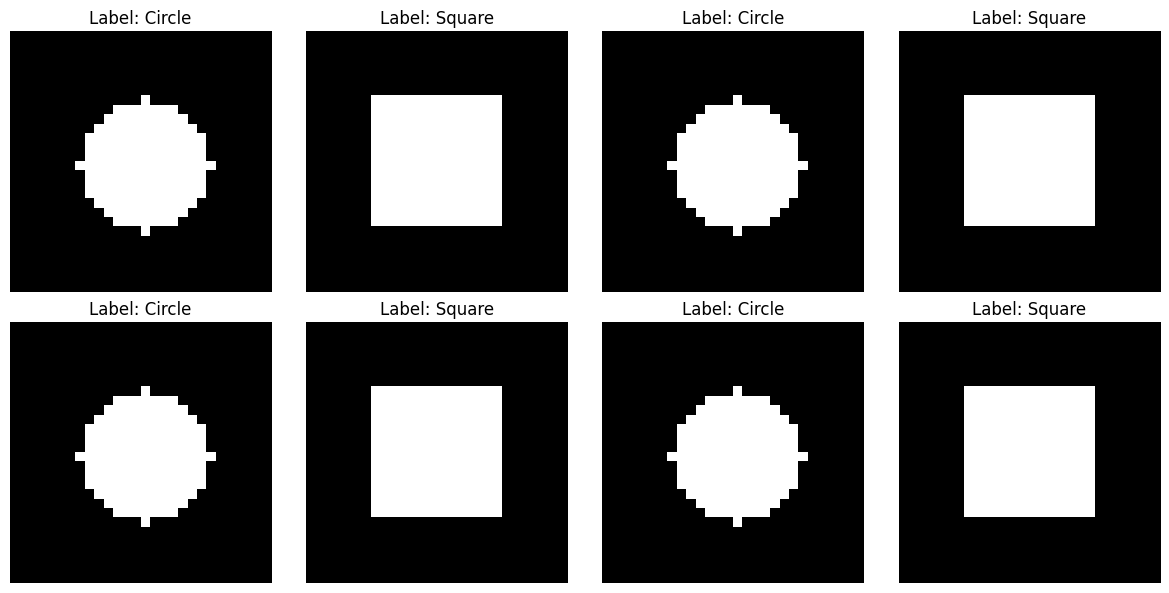


=== Exercício 3B: Com Transformações ===
Formato da imagem transformada: torch.Size([1, 28, 28])


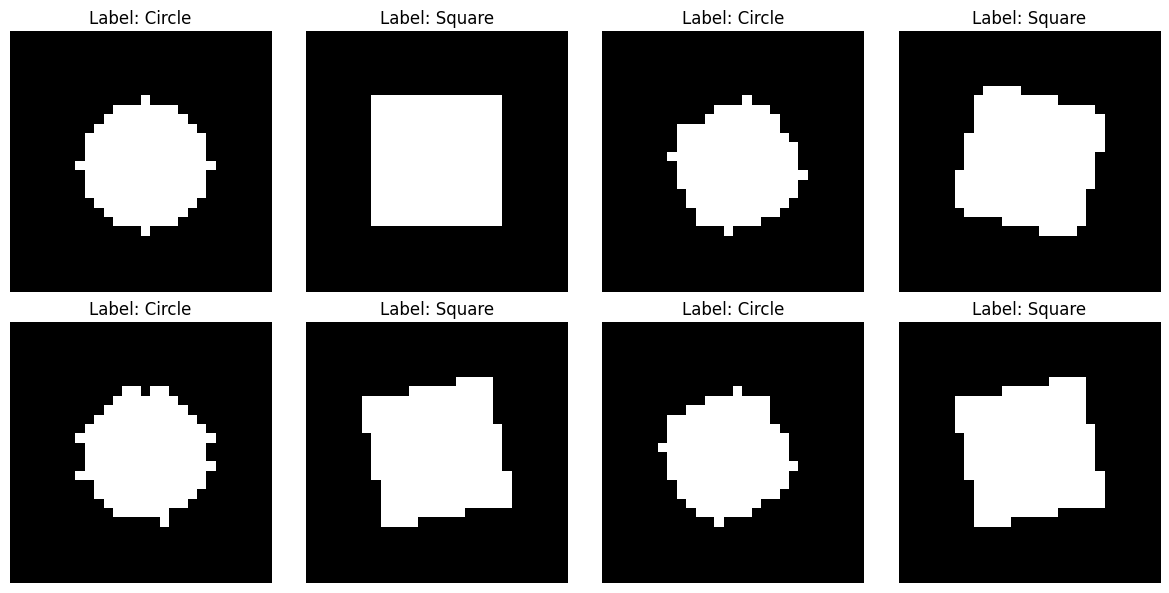


=== Exercício 3C: Comparação Transformações ===


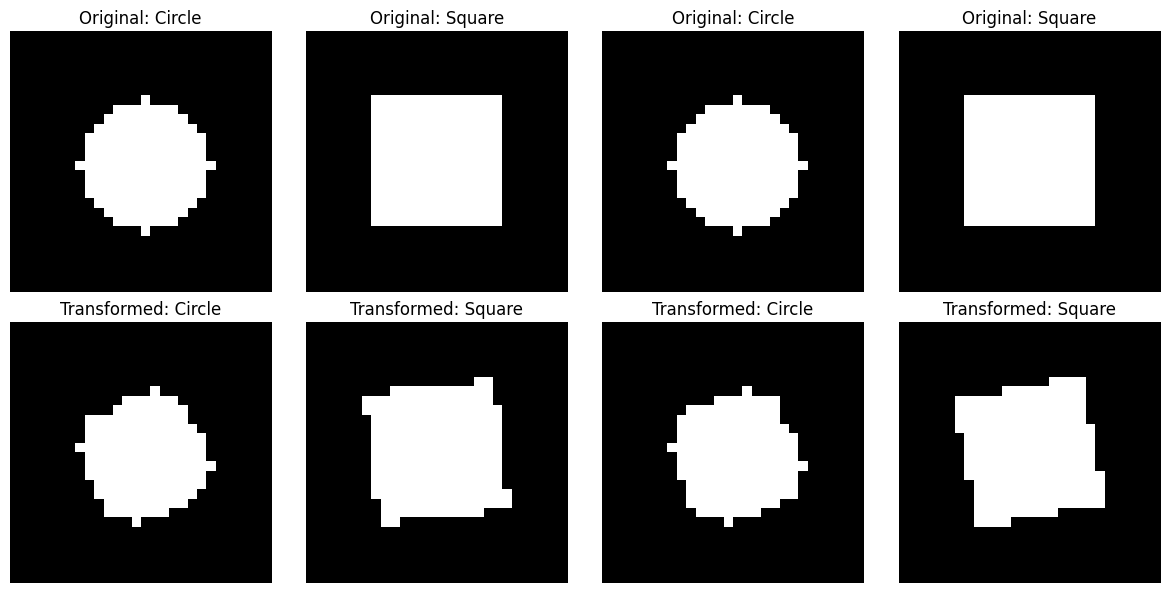

In [ ]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class SyntheticImageDataset(Dataset):
    def __init__(self, num_samples=1000, img_size=28, transform=None):
        self.num_samples = num_samples
        self.img_size = img_size
        self.transform = transform

        # Gerar dados sintéticos
        torch.manual_seed(42)
        np.random.seed(42)

        self.images = []
        self.labels = []

        for i in range(num_samples):
            # Criar imagem sintética: círculo ou quadrado
            img = np.zeros((img_size, img_size), dtype=np.uint8)

            if i % 2 == 0:  # Círculo
                center = img_size // 2
                radius = img_size // 4
                y, x = np.ogrid[:img_size, :img_size]
                mask = (x - center)**2 + (y - center)**2 <= radius**2
                img[mask] = 255
                label = 0
            else:  # Quadrado
                start = img_size // 4
                end = 3 * img_size // 4
                img[start:end, start:end] = 255
                label = 1

            self.images.append(Image.fromarray(img))
            self.labels.append(label)

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Função para visualizar amostras
def show_samples(dataset, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.flatten()

    for i in range(num_samples):
        img, label = dataset[i]

        if isinstance(img, torch.Tensor):
            img = img.squeeze().numpy()
        else:
            img = np.array(img)

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {"Circle" if label == 0 else "Square"}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Teste básico
print("=== Exercício 3A: Dataset de Imagens Sintéticas ===")
dataset = SyntheticImageDataset(num_samples=100)
print(f"Tamanho do dataset: {len(dataset)}")
print(f"Primeira amostra - Tipo: {type(dataset[0][0])}, Label: {dataset[0][1]}")
show_samples(dataset)

# Com transformações
print("\n=== Exercício 3B: Com Transformações ===")
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

dataset_transformed = SyntheticImageDataset(num_samples=100, transform=transform)
print(f"Formato da imagem transformada: {dataset_transformed[0][0].shape}")
show_samples(dataset_transformed)

# Comparação antes/depois
print("\n=== Exercício 3C: Comparação Transformações ===")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(4):
    # Original
    orig_img, orig_label = dataset[i]
    axes[0, i].imshow(np.array(orig_img), cmap='gray')
    axes[0, i].set_title(f'Original: {"Circle" if orig_label == 0 else "Square"}')
    axes[0, i].axis('off')

    # Transformada
    trans_img, trans_label = dataset_transformed[i]
    # Desnormalizar para visualização
    trans_img_vis = (trans_img.squeeze() * 0.5) + 0.5
    axes[1, i].imshow(trans_img_vis, cmap='gray')
    axes[1, i].set_title(f'Transformed: {"Circle" if trans_label == 0 else "Square"}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()